# Load Data into Dataframes and modify

In [1]:
from formulas import *
import formulas as fl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline  

In [2]:
# Read data in to dataframes
spy = pd.read_csv('SPY.csv')
dia = pd.read_csv('MSFT.csv')
qqq = pd.read_csv('TSLA.csv')
btc = yf.Ticker("BTC-USD").history(period="max")


# Change date column to datetime type
spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])
qqq['Date'] = pd.to_datetime(qqq['Date'])



It is better to make predictions of returns versus stock price. This is because a 2% gain on a 100 dollar stock is not the same as a 2% gain on a 10 dollar stock. Stock returns are stationary in the fact that the magnitude is always in the same relative range. We will do a distribution plot further in the notebook.

In [17]:
# compute daily return
spy["day_return"] = spy["Close"].pct_change()
dia["day_return"] = dia["Close"].pct_change()
btc["day_return"] = btc['Close'].pct_change()

# compute daily log return
spy['log_day_return'] = np.log(spy['Close']) - np.log(spy['Close'].shift(1))
dia['log_day_return'] = np.log(dia['Close']) - np.log(dia['Close'].shift(1))

# Drop first row as the newly calculated columns will be N/A due to no previous data
spy = spy.iloc[1:]
dia = dia.iloc[1:]
btc = btc.iloc[1:]


### Arima Model

In [4]:
from statsmodels.tsa.arima.model import ARIMA

c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


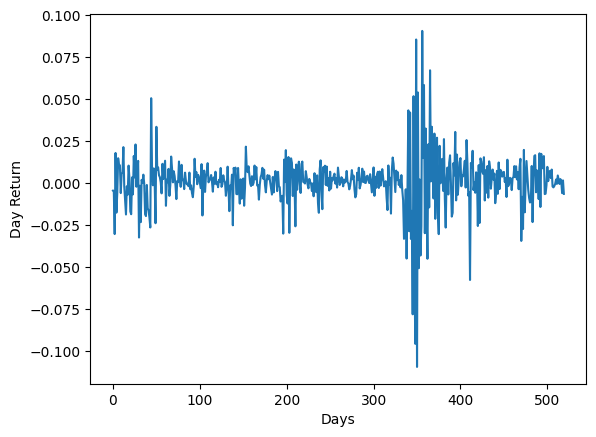

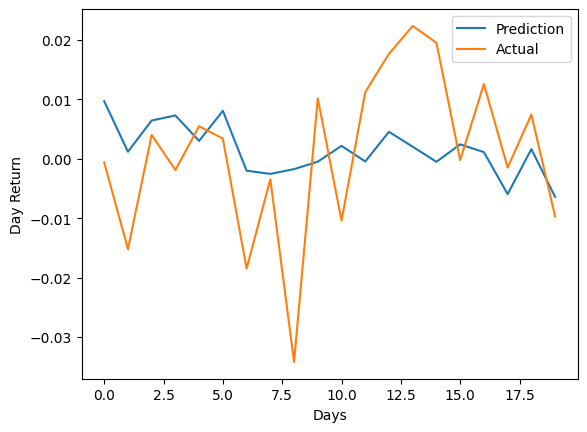

In [17]:
f=20
r=1
df = pd.DataFrame(spy.loc[:, 'day_return'])
temp = list(df['day_return'])
temp = temp[6479:6979]
dr=temp
# dr = [i-min(temp) for i in temp]


for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(spy['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()

c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\karth\.conda\envs\cenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


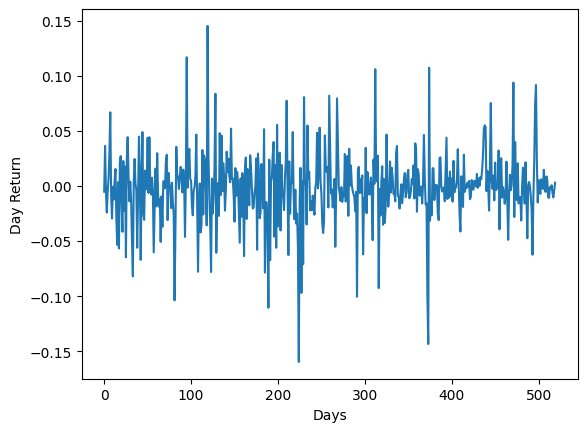

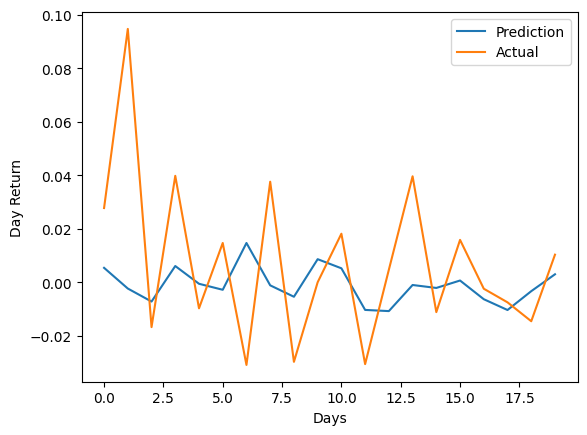

In [20]:
f=20
r=1
df = pd.DataFrame(btc.loc[:, 'day_return'])
temp = list(df['day_return'])
l = len(temp)
temp = temp[l-500-f:l-f]
dr=temp
# dr = [i-min(temp) for i in temp]



for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(btc['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()


In [19]:
f=20
r=1
df = pd.DataFrame(btc.loc[:, 'Close'])
temp = list(df['Close'])
l = len(temp)
temp = temp[l-f-150:l-f]
dr=temp
# dr = [i-min(temp) for i in temp]


for i in range(r):
    model = ARIMA(dr, order=(100,1,1))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Close")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(btc['Close'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Close")
plt.legend()
plt.show()

TypeError: ARIMA.__init__() got an unexpected keyword argument 'enforce_stationary'